In [1]:
%load_ext autoreload
%autoreload 2
### HIER DIE METHODEN REIN WIR IN TRAINNLP 
import torch
from torch import nn

import train
import TorchRandomSeed
import modelClass
import dataloader
from torch.utils.data import SubsetRandomSampler
from time import time
seed =1
seedObject = TorchRandomSeed.TorchRandomSeed(seed=1) 

_t_start = time()

with seedObject:
    droplist = []#["BloodPressure", "Pregnancies", "Age", "SkinThickness"]
    num_epochs = 150
    batch_size = 32
    test_size = 0.5 # is going to be split again in eval and test
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    #dirPath = "/home/rosario/explainable/Bachelor/"# root
    dirPath= "./" 

    modelsDirPath = dirPath+ "Models"

    print("calculating on: " +str(device))
    lr = 0.001 #slowed learningrate # 0.1 after 20 epoch full

    # load data
  
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.load_kaggle_diabetes_dataset(batch_size=batch_size)
    trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.BreastCancerUCI(batch_size= batch_size, test_size=test_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.dryBeanUCI(batch_size=batch_size , droplist= droplist)
    
    #model = modelClass.Net(inputFeatures= inputFeatures, out_features=outputFeatures)
    model= modelClass.BinaryClassification2HL64N(inputFeatures= inputFeatures, outputFeatures= outputFeatures)
    modelName = model.modelName
    
    #print(random_indices_test)

    #for i,c in testloader:
    #    print(i[0])
    #    print(X_test[random_indices_test[0]])
    #    break
    
    # Backward Propergation - loss and optimizer
    loss_function = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    optimizer = torch.optim.Adam(model.parameters())
    #grads = train.train(trainloader, model, num_epochs, device, y_train,loss_function, optimizer)    
    total_gradientsList =  train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
 
    #train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
    print(dirPath)

    import evalModel
    import plotResults
    from matplotlib import pyplot as plt
    print("evaluating ...")
    loaderList = [testloader]
    nameList = ["test"]
    yList = [y_test]
    evalModel.doALLeval(model, modelsDirPath, dirPath, loaderList, device,optimizer, loss_function, num_epochs, nameList, yList, inputFeatures, random_indices_test)
    #print(dirPath)
    print(modelsDirPath)

calculating on: cpu
(569,)
(569, 30)
tensor([[-0.2435, -0.2473,  0.2055,  ..., -0.3219, -0.3210, -0.3220],
        [-0.2397, -0.2066,  0.1991,  ..., -0.3178, -0.3167, -0.3183],
        [-0.2316, -0.2095,  0.2728,  ..., -0.3239, -0.3222, -0.3240],
        ...,
        [-0.2447, -0.1818,  0.2593,  ..., -0.3372, -0.3360, -0.3371],
        [-0.2309, -0.2157,  0.2257,  ..., -0.3165, -0.3153, -0.3164],
        [-0.2343, -0.2549,  0.2200,  ..., -0.3162, -0.3152, -0.3164]])
train:shuffel = False
eval:shuffel = False


/home/rosario/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch: 0
      Training_acc: 0.6161971830985915
-------------------

Epoch: 1
      Training_acc: 0.6161971830985915
-------------------

Epoch: 2
      Training_acc: 0.6161971830985915
-------------------

Epoch: 3
      Training_acc: 0.6161971830985915
-------------------

Epoch: 4
      Training_acc: 0.6161971830985915
-------------------

Epoch: 5
      Training_acc: 0.6161971830985915
-------------------

Epoch: 6
      Training_acc: 0.6161971830985915
-------------------

Epoch: 7
      Training_acc: 0.676056338028169
-------------------

Epoch: 8
      Training_acc: 0.7464788732394366
-------------------

Epoch: 9
      Training_acc: 0.8450704225352113
-------------------

Epoch: 10
      Training_acc: 0.8697183098591549
-------------------

Epoch: 11
      Training_acc: 0.9119718309859155
-------------------

Epoch: 12
      Training_acc: 0.9225352112676056
-------------------

Epoch: 13
      Training_acc: 0.9366197183098591
-------------------

Epoch: 14
      Training_acc: 0

9it [00:01,  8.36it/s]

Progess: 0.59%
test acc: 63.86%
test Loss: 0.68
-------------------


18it [00:02,  7.80it/s]

Progess: 1.26%
test acc: 63.86%
test Loss: 0.68
-------------------


27it [00:03,  8.59it/s]

Progess: 1.93%
test acc: 63.86%
test Loss: 0.67
-------------------


36it [00:04,  8.57it/s]

Progess: 2.59%
test acc: 63.86%
test Loss: 0.67
-------------------


45it [00:05,  8.52it/s]

Progess: 3.26%
test acc: 63.86%
test Loss: 0.66
-------------------


54it [00:06,  8.25it/s]

Progess: 3.93%
test acc: 63.86%
test Loss: 0.66
-------------------


63it [00:07,  8.54it/s]

Progess: 4.59%
test acc: 64.64%
test Loss: 0.66
-------------------


72it [00:08,  8.74it/s]

Progess: 5.26%
test acc: 69.12%
test Loss: 0.66
-------------------


81it [00:09,  8.23it/s]

Progess: 5.93%
test acc: 74.81%
test Loss: 0.65
-------------------


90it [00:11,  8.03it/s]

Progess: 6.59%
test acc: 82.11%
test Loss: 0.65
-------------------


99it [00:12,  8.62it/s]

Progess: 7.26%
test acc: 84.37%
test Loss: 0.64
-------------------


108it [00:13,  8.56it/s]

Progess: 7.93%
test acc: 86.98%
test Loss: 0.64
-------------------


117it [00:14,  8.10it/s]

Progess: 8.59%
test acc: 88.15%
test Loss: 0.63
-------------------


126it [00:15,  8.41it/s]

Progess: 9.26%
test acc: 88.77%
test Loss: 0.62
-------------------


135it [00:16,  8.80it/s]

Progess: 9.93%
test acc: 89.36%
test Loss: 0.62
-------------------


144it [00:17,  8.59it/s]

Progess: 10.59%
test acc: 89.82%
test Loss: 0.61
-------------------


153it [00:18,  8.74it/s]

Progess: 11.26%
test acc: 89.90%
test Loss: 0.60
-------------------


162it [00:19,  8.67it/s]

Progess: 11.93%
test acc: 90.14%
test Loss: 0.60
-------------------


171it [00:20,  8.14it/s]

Progess: 12.59%
test acc: 90.21%
test Loss: 0.59
-------------------


180it [00:21,  8.25it/s]

Progess: 13.26%
test acc: 90.14%
test Loss: 0.58
-------------------


189it [00:22,  8.27it/s]

Progess: 13.93%
test acc: 90.25%
test Loss: 0.58
-------------------


198it [00:23,  8.52it/s]

Progess: 14.59%
test acc: 90.29%
test Loss: 0.57
-------------------


207it [00:25,  8.65it/s]

Progess: 15.26%
test acc: 90.21%
test Loss: 0.57
-------------------


216it [00:26,  8.78it/s]

Progess: 15.93%
test acc: 90.29%
test Loss: 0.56
-------------------


225it [00:27,  8.35it/s]

Progess: 16.59%
test acc: 90.21%
test Loss: 0.55
-------------------


234it [00:28,  8.09it/s]

Progess: 17.26%
test acc: 90.21%
test Loss: 0.55
-------------------


243it [00:29,  8.73it/s]

Progess: 17.93%
test acc: 90.21%
test Loss: 0.54
-------------------


252it [00:30,  8.37it/s]

Progess: 18.59%
test acc: 90.21%
test Loss: 0.54
-------------------


261it [00:31,  8.32it/s]

Progess: 19.26%
test acc: 90.25%
test Loss: 0.53
-------------------


270it [00:32,  8.24it/s]

Progess: 19.93%
test acc: 90.21%
test Loss: 0.53
-------------------


279it [00:33,  8.66it/s]

Progess: 20.59%
test acc: 90.21%
test Loss: 0.52
-------------------


288it [00:34,  8.32it/s]

Progess: 21.26%
test acc: 90.21%
test Loss: 0.52
-------------------


297it [00:35,  8.54it/s]

Progess: 21.93%
test acc: 90.21%
test Loss: 0.52
-------------------


306it [00:37,  8.29it/s]

Progess: 22.59%
test acc: 90.25%
test Loss: 0.51
-------------------


315it [00:38,  8.73it/s]

Progess: 23.26%
test acc: 90.29%
test Loss: 0.51
-------------------


324it [00:39,  8.40it/s]

Progess: 23.93%
test acc: 90.29%
test Loss: 0.50
-------------------


333it [00:40,  8.07it/s]

Progess: 24.59%
test acc: 90.25%
test Loss: 0.50
-------------------


342it [00:41,  8.26it/s]

Progess: 25.26%
test acc: 90.25%
test Loss: 0.50
-------------------


351it [00:42,  8.47it/s]

Progess: 25.93%
test acc: 90.29%
test Loss: 0.49
-------------------


360it [00:43,  8.44it/s]

Progess: 26.59%
test acc: 90.25%
test Loss: 0.49
-------------------


369it [00:44,  8.16it/s]

Progess: 27.26%
test acc: 90.25%
test Loss: 0.49
-------------------


378it [00:45,  7.80it/s]

Progess: 27.93%
test acc: 90.25%
test Loss: 0.48
-------------------


387it [00:46,  8.40it/s]

Progess: 28.59%
test acc: 90.25%
test Loss: 0.48
-------------------


396it [00:47,  8.47it/s]

Progess: 29.26%
test acc: 90.25%
test Loss: 0.48
-------------------


405it [00:49,  8.43it/s]

Progess: 29.93%
test acc: 90.25%
test Loss: 0.48
-------------------


414it [00:50,  8.26it/s]

Progess: 30.59%
test acc: 90.29%
test Loss: 0.47
-------------------


423it [00:51,  8.43it/s]

Progess: 31.26%
test acc: 90.25%
test Loss: 0.47
-------------------


432it [00:52,  8.39it/s]

Progess: 31.93%
test acc: 90.25%
test Loss: 0.47
-------------------


441it [00:53,  8.27it/s]

Progess: 32.59%
test acc: 90.25%
test Loss: 0.47
-------------------


450it [00:54,  8.51it/s]

Progess: 33.26%
test acc: 90.29%
test Loss: 0.46
-------------------


459it [00:55,  8.34it/s]

Progess: 33.93%
test acc: 90.33%
test Loss: 0.46
-------------------


468it [00:56,  8.23it/s]

Progess: 34.59%
test acc: 90.29%
test Loss: 0.46
-------------------


477it [00:57,  8.27it/s]

Progess: 35.26%
test acc: 90.33%
test Loss: 0.46
-------------------


486it [00:59,  8.40it/s]

Progess: 35.93%
test acc: 90.25%
test Loss: 0.45
-------------------


495it [01:00,  8.63it/s]

Progess: 36.59%
test acc: 90.33%
test Loss: 0.45
-------------------


504it [01:01,  8.19it/s]

Progess: 37.26%
test acc: 90.29%
test Loss: 0.45
-------------------


513it [01:02,  8.50it/s]

Progess: 37.93%
test acc: 90.29%
test Loss: 0.45
-------------------


522it [01:03,  8.42it/s]

Progess: 38.59%
test acc: 90.29%
test Loss: 0.45
-------------------


531it [01:04,  8.44it/s]

Progess: 39.26%
test acc: 90.29%
test Loss: 0.44
-------------------


540it [01:05,  8.30it/s]

Progess: 39.93%
test acc: 90.29%
test Loss: 0.44
-------------------


549it [01:06,  8.26it/s]

Progess: 40.59%
test acc: 90.25%
test Loss: 0.44
-------------------


558it [01:07,  8.29it/s]

Progess: 41.26%
test acc: 90.25%
test Loss: 0.44
-------------------


567it [01:08,  8.50it/s]

Progess: 41.93%
test acc: 90.25%
test Loss: 0.44
-------------------


576it [01:10,  8.16it/s]

Progess: 42.59%
test acc: 90.25%
test Loss: 0.43
-------------------


585it [01:11,  8.19it/s]

Progess: 43.26%
test acc: 90.25%
test Loss: 0.43
-------------------


594it [01:12,  8.24it/s]

Progess: 43.93%
test acc: 90.25%
test Loss: 0.43
-------------------


603it [01:13,  7.99it/s]

Progess: 44.59%
test acc: 90.25%
test Loss: 0.43
-------------------


612it [01:14,  8.05it/s]

Progess: 45.26%
test acc: 90.25%
test Loss: 0.43
-------------------


621it [01:15,  8.36it/s]

Progess: 45.93%
test acc: 90.25%
test Loss: 0.43
-------------------


630it [01:16,  8.15it/s]

Progess: 46.59%
test acc: 90.25%
test Loss: 0.43
-------------------


639it [01:17,  7.90it/s]

Progess: 47.26%
test acc: 90.25%
test Loss: 0.42
-------------------


648it [01:19,  8.01it/s]

Progess: 47.93%
test acc: 90.25%
test Loss: 0.42
-------------------


657it [01:20,  7.92it/s]

Progess: 48.59%
test acc: 90.25%
test Loss: 0.42
-------------------


666it [01:21,  8.50it/s]

Progess: 49.26%
test acc: 90.21%
test Loss: 0.42
-------------------


675it [01:22,  8.17it/s]

Progess: 49.93%
test acc: 90.21%
test Loss: 0.42
-------------------


684it [01:23,  8.25it/s]

Progess: 50.59%
test acc: 90.21%
test Loss: 0.42
-------------------


693it [01:24,  8.22it/s]

Progess: 51.26%
test acc: 90.21%
test Loss: 0.42
-------------------


702it [01:25,  8.02it/s]

Progess: 51.93%
test acc: 90.21%
test Loss: 0.41
-------------------


711it [01:26,  8.41it/s]

Progess: 52.59%
test acc: 90.21%
test Loss: 0.41
-------------------


720it [01:27,  8.28it/s]

Progess: 53.26%
test acc: 90.21%
test Loss: 0.41
-------------------


729it [01:29,  8.68it/s]

Progess: 53.93%
test acc: 90.21%
test Loss: 0.41
-------------------


738it [01:30,  8.88it/s]

Progess: 54.59%
test acc: 90.21%
test Loss: 0.41
-------------------


747it [01:31,  8.35it/s]

Progess: 55.26%
test acc: 90.25%
test Loss: 0.41
-------------------


756it [01:32,  8.03it/s]

Progess: 55.93%
test acc: 90.25%
test Loss: 0.41
-------------------


765it [01:33,  7.88it/s]

Progess: 56.59%
test acc: 90.25%
test Loss: 0.41
-------------------


774it [01:34,  8.25it/s]

Progess: 57.26%
test acc: 90.25%
test Loss: 0.40
-------------------


783it [01:35,  8.25it/s]

Progess: 57.93%
test acc: 90.25%
test Loss: 0.40
-------------------


792it [01:36,  8.24it/s]

Progess: 58.59%
test acc: 90.25%
test Loss: 0.40
-------------------


801it [01:37,  8.38it/s]

Progess: 59.26%
test acc: 90.25%
test Loss: 0.40
-------------------


810it [01:39,  8.14it/s]

Progess: 59.93%
test acc: 90.25%
test Loss: 0.40
-------------------


819it [01:40,  8.27it/s]

Progess: 60.59%
test acc: 90.29%
test Loss: 0.40
-------------------


828it [01:41,  8.11it/s]

Progess: 61.26%
test acc: 90.29%
test Loss: 0.40
-------------------


837it [01:42,  8.04it/s]

Progess: 61.93%
test acc: 90.29%
test Loss: 0.40
-------------------


846it [01:43,  8.15it/s]

Progess: 62.59%
test acc: 90.29%
test Loss: 0.40
-------------------


855it [01:44,  8.12it/s]

Progess: 63.26%
test acc: 90.29%
test Loss: 0.40
-------------------


864it [01:45,  8.15it/s]

Progess: 63.93%
test acc: 90.29%
test Loss: 0.39
-------------------


873it [01:46,  8.11it/s]

Progess: 64.59%
test acc: 90.29%
test Loss: 0.39
-------------------


882it [01:48,  8.02it/s]

Progess: 65.26%
test acc: 90.29%
test Loss: 0.39
-------------------


891it [01:49,  7.86it/s]

Progess: 65.93%
test acc: 90.29%
test Loss: 0.39
-------------------


900it [01:50,  7.84it/s]

Progess: 66.59%
test acc: 90.25%
test Loss: 0.39
-------------------


909it [01:51,  8.00it/s]

Progess: 67.26%
test acc: 90.33%
test Loss: 0.39
-------------------


918it [01:52,  8.38it/s]

Progess: 67.93%
test acc: 90.33%
test Loss: 0.39
-------------------


927it [01:53,  8.11it/s]

Progess: 68.59%
test acc: 90.33%
test Loss: 0.39
-------------------


936it [01:54,  8.05it/s]

Progess: 69.26%
test acc: 90.33%
test Loss: 0.39
-------------------


945it [01:55,  8.25it/s]

Progess: 69.93%
test acc: 90.33%
test Loss: 0.39
-------------------


954it [01:57,  7.95it/s]

Progess: 70.59%
test acc: 90.33%
test Loss: 0.39
-------------------


963it [01:58,  7.98it/s]

Progess: 71.26%
test acc: 90.33%
test Loss: 0.39
-------------------


972it [01:59,  8.19it/s]

Progess: 71.93%
test acc: 90.33%
test Loss: 0.38
-------------------


981it [02:00,  8.09it/s]

Progess: 72.59%
test acc: 90.33%
test Loss: 0.38
-------------------


990it [02:01,  7.87it/s]

Progess: 73.26%
test acc: 90.33%
test Loss: 0.38
-------------------


999it [02:02,  8.11it/s]

Progess: 73.93%
test acc: 90.33%
test Loss: 0.38
-------------------


1008it [02:04,  8.07it/s]

Progess: 74.59%
test acc: 90.33%
test Loss: 0.38
-------------------


1017it [02:05,  8.01it/s]

Progess: 75.26%
test acc: 90.33%
test Loss: 0.38
-------------------


1026it [02:06,  8.37it/s]

Progess: 75.93%
test acc: 90.33%
test Loss: 0.38
-------------------


1035it [02:07,  7.88it/s]

Progess: 76.59%
test acc: 90.33%
test Loss: 0.38
-------------------


1044it [02:08,  8.19it/s]

Progess: 77.26%
test acc: 90.33%
test Loss: 0.38
-------------------


1053it [02:09,  8.11it/s]

Progess: 77.93%
test acc: 90.37%
test Loss: 0.38
-------------------


1062it [02:10,  8.47it/s]

Progess: 78.59%
test acc: 90.37%
test Loss: 0.38
-------------------


1071it [02:11,  8.20it/s]

Progess: 79.26%
test acc: 90.37%
test Loss: 0.38
-------------------


1080it [02:13,  7.97it/s]

Progess: 79.93%
test acc: 90.37%
test Loss: 0.38
-------------------


1089it [02:14,  8.20it/s]

Progess: 80.59%
test acc: 90.37%
test Loss: 0.38
-------------------


1098it [02:15,  8.05it/s]

Progess: 81.26%
test acc: 90.37%
test Loss: 0.37
-------------------


1107it [02:16,  8.13it/s]

Progess: 81.93%
test acc: 90.37%
test Loss: 0.37
-------------------


1116it [02:17,  8.46it/s]

Progess: 82.59%
test acc: 90.41%
test Loss: 0.37
-------------------


1125it [02:18,  8.13it/s]

Progess: 83.26%
test acc: 90.41%
test Loss: 0.37
-------------------


1134it [02:19,  7.94it/s]

Progess: 83.93%
test acc: 90.41%
test Loss: 0.37
-------------------


1143it [02:20,  7.82it/s]

Progess: 84.59%
test acc: 90.45%
test Loss: 0.37
-------------------


1152it [02:22,  6.54it/s]

Progess: 85.26%
test acc: 90.45%
test Loss: 0.37
-------------------


1161it [02:23,  7.33it/s]

Progess: 85.93%
test acc: 90.45%
test Loss: 0.37
-------------------


1170it [02:24,  7.40it/s]

Progess: 86.59%
test acc: 90.45%
test Loss: 0.37
-------------------


1179it [02:26,  6.83it/s]

Progess: 87.26%
test acc: 90.45%
test Loss: 0.37
-------------------


1188it [02:27,  7.39it/s]

Progess: 87.93%
test acc: 90.45%
test Loss: 0.37
-------------------


1197it [02:28,  7.79it/s]

Progess: 88.59%
test acc: 90.45%
test Loss: 0.37
-------------------


1206it [02:29,  7.69it/s]

Progess: 89.26%
test acc: 90.45%
test Loss: 0.37
-------------------


1215it [02:30,  6.87it/s]

Progess: 89.93%
test acc: 90.45%
test Loss: 0.37
-------------------


1224it [02:32,  6.82it/s]

Progess: 90.59%
test acc: 90.45%
test Loss: 0.37
-------------------


1233it [02:33,  6.82it/s]

Progess: 91.26%
test acc: 90.45%
test Loss: 0.37
-------------------


1242it [02:34,  7.70it/s]

Progess: 91.93%
test acc: 90.45%
test Loss: 0.37
-------------------


1251it [02:35,  7.77it/s]

Progess: 92.59%
test acc: 90.45%
test Loss: 0.36
-------------------


1260it [02:36,  7.82it/s]

Progess: 93.26%
test acc: 90.49%
test Loss: 0.36
-------------------


1269it [02:38,  7.99it/s]

Progess: 93.93%
test acc: 90.49%
test Loss: 0.36
-------------------


1278it [02:39,  8.32it/s]

Progess: 94.59%
test acc: 90.49%
test Loss: 0.36
-------------------


1287it [02:40,  7.97it/s]

Progess: 95.26%
test acc: 90.49%
test Loss: 0.36
-------------------


1296it [02:41,  8.06it/s]

Progess: 95.93%
test acc: 90.53%
test Loss: 0.36
-------------------


1305it [02:42,  8.27it/s]

Progess: 96.59%
test acc: 90.53%
test Loss: 0.36
-------------------


1314it [02:43,  7.50it/s]

Progess: 97.26%
test acc: 90.53%
test Loss: 0.36
-------------------


1323it [02:44,  7.84it/s]

Progess: 97.93%
test acc: 90.53%
test Loss: 0.36
-------------------


1332it [02:46,  7.41it/s]

Progess: 98.59%
test acc: 90.53%
test Loss: 0.36
-------------------


1341it [02:47,  7.24it/s]

Progess: 99.26%
test acc: 90.53%
test Loss: 0.36
-------------------


1350it [02:48,  8.00it/s]


Progess: 99.93%
test acc: 90.53%
test Loss: 0.36
-------------------
./Models


plotting trainingResults...
cosine_similarity
percentageWeightsSignDifference3
weightsMagnitude3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


L2Distance3
weightTrace3
averageGradientMagnitude3
plotting: GM GradientMagnitude averaged over features
GradientMagnitudePerFeature3
plotting: GM GradientMagnitude PerFeature
total_gradientsList
plotting: total gradient magnitude Averaged over number of grads in parameters
0
0.1369311
1
0.1566851
2
0.07203244
3
0.15166357
4
0.021815358
5
0.017421354
6
0.15814713
7
0.1879939
8
0.25470996
9
0.066044375
10
0.091358416
11
0.014423374
12
0.2112383
13
0.037817296
14
0.074537106
15
0.10357275
16
0.1383914
17
0.21005763
18
0.019276472
19
0.04573084
20
0.038123623
21
0.2631824
22
0.08071477
23
0.11498674
24
0.0730348
25
0.11345779
26
0.1906886
27
0.006551482
28
0.028916668
29
0.049476355
30
0.27527472
31
0.087005325
32
0.11868283
33
0.07498844
34
0.1189601
35
0.19883054
36
0.0071915817
37
0.03426911
38
0.045408145
39
0.2724828
40
0.08356655
41
0.114934295
42
0.08156587
43
0.12664685
44
0.20597652
45
0.011698637
46
0.033808466
47
0.050003633
48
0.2806223
49
0.09203727
50
0.1211139
51
0.08255685

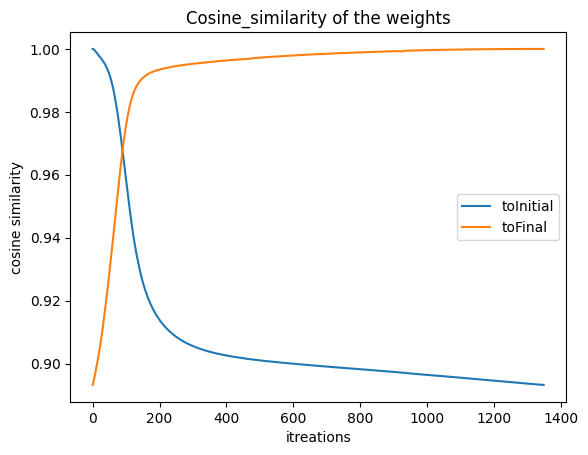

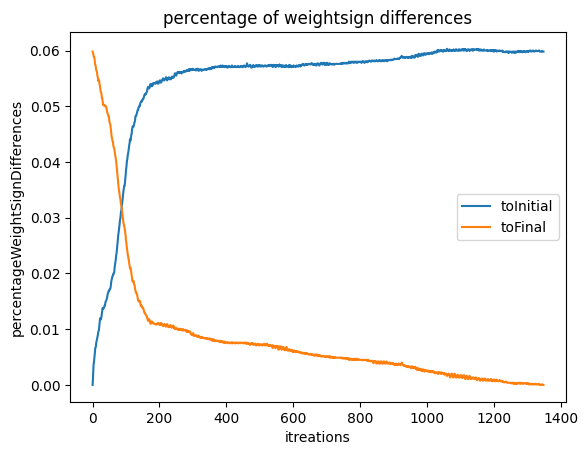

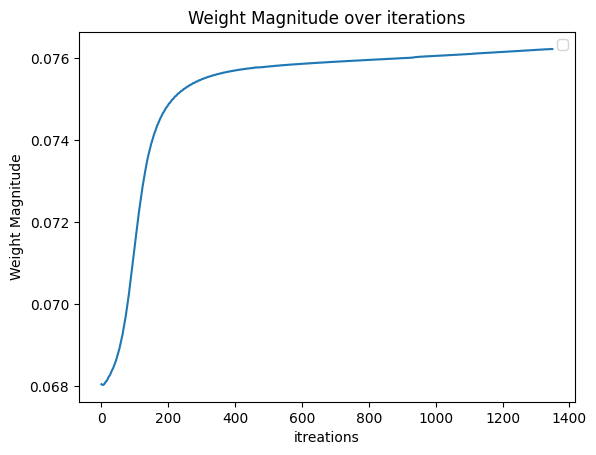

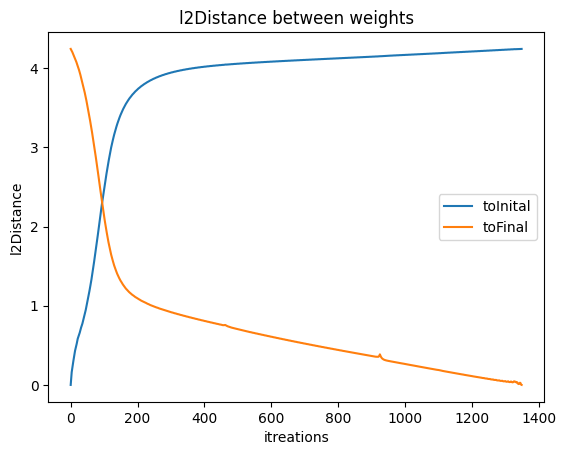

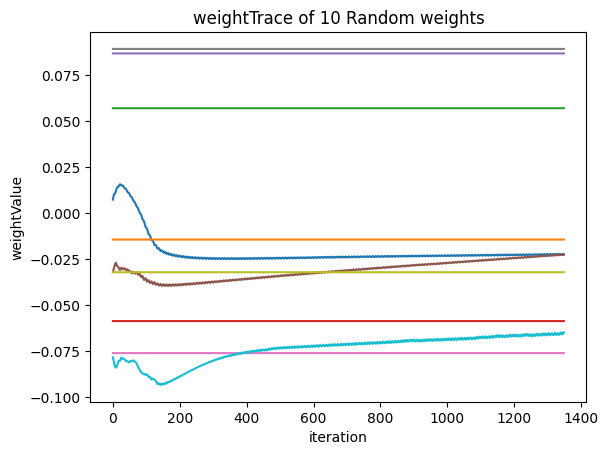

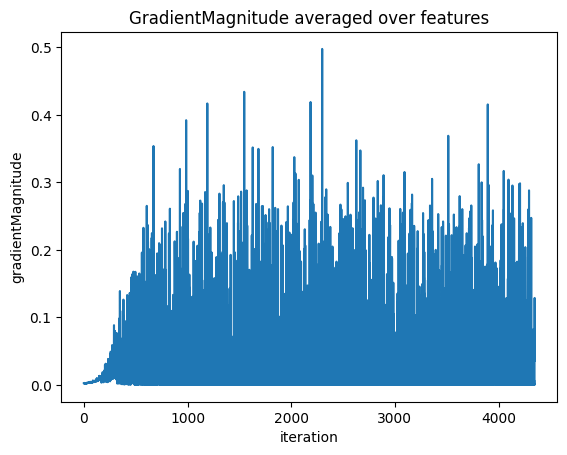

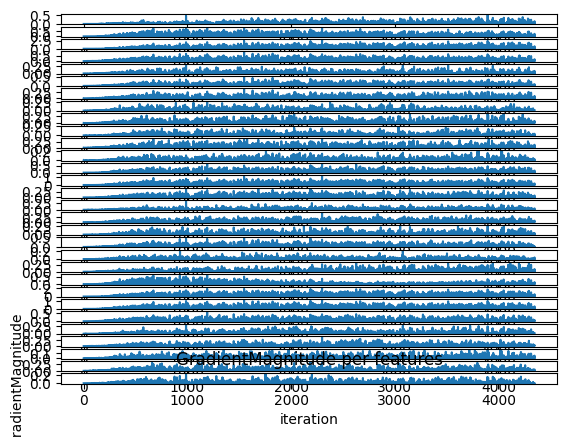

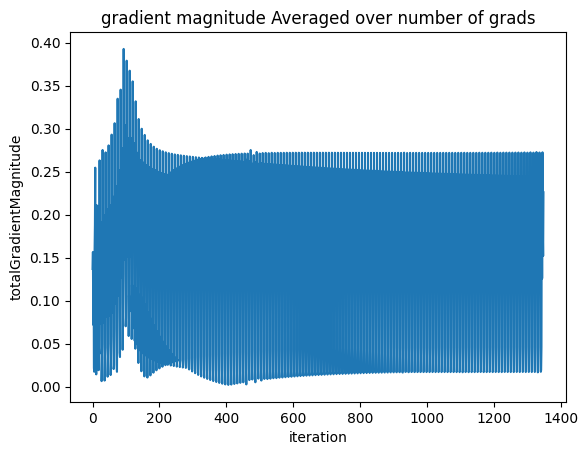

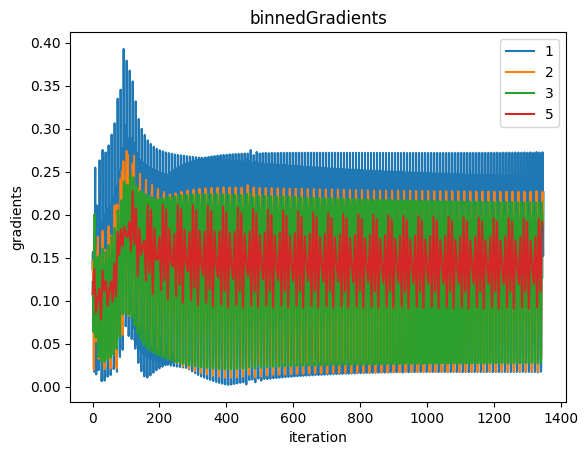

In [2]:
import utils
if datasetType == "NLP":
    dataPath= dirPath+ "NLP_Results/Trainingresults/"
else:
    dataPath= dirPath+ "Results/Trainingresults/"
utils.appendToNPZ(dataPath+ "data.npz", "Total_gradientsList_iteration", total_gradientsList)
data = utils.loadData(dataPath+ "data.npz")


plotResults.plotTrainingResults(data, dataPath)

In [3]:
import cega_utils
from datetime import datetime
import numpy as np

datasetType = "numerical"
now = datetime.now()
date_time_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Replace space with underscore
date_time_string = date_time_string.replace(" ", "_")

pathToNPZ =  cega_utils.runCEGA(dirPath, modelsDirPath, model, X_test, device, data,date_time_string, testloader , datasetType)





(150, 29, 30)
numerical


  0%|          | 0/1350 [00:00<?, ?it/s]

0


  0%|          | 1/1350 [00:00<05:03,  4.45it/s]

1


  0%|          | 2/1350 [00:00<04:31,  4.96it/s]

2


  0%|          | 3/1350 [00:00<04:23,  5.11it/s]

3


  0%|          | 4/1350 [00:00<04:13,  5.31it/s]

4


  0%|          | 5/1350 [00:00<04:06,  5.45it/s]

5


  0%|          | 6/1350 [00:01<04:05,  5.48it/s]

6


  1%|          | 7/1350 [00:01<04:03,  5.53it/s]

7


  1%|          | 8/1350 [00:01<04:01,  5.55it/s]

8


  1%|          | 9/1350 [00:01<04:00,  5.57it/s]

9


  1%|          | 10/1350 [00:01<03:59,  5.59it/s]

10


  1%|          | 11/1350 [00:02<03:59,  5.58it/s]

11


  1%|          | 12/1350 [00:02<03:58,  5.60it/s]

12


  1%|          | 13/1350 [00:02<03:57,  5.63it/s]

13


  1%|          | 14/1350 [00:02<03:56,  5.64it/s]

14


  1%|          | 15/1350 [00:02<03:56,  5.64it/s]

15


  1%|          | 16/1350 [00:02<03:58,  5.59it/s]

16


  1%|▏         | 17/1350 [00:03<04:00,  5.53it/s]

17


  1%|▏         | 18/1350 [00:03<03:59,  5.56it/s]

18


  1%|▏         | 19/1350 [00:03<03:57,  5.62it/s]

19


  1%|▏         | 20/1350 [00:03<03:59,  5.54it/s]

20


  2%|▏         | 21/1350 [00:03<04:06,  5.38it/s]

21


  2%|▏         | 22/1350 [00:04<04:08,  5.35it/s]

22


  2%|▏         | 23/1350 [00:04<04:05,  5.42it/s]

23


  2%|▏         | 24/1350 [00:04<04:01,  5.50it/s]

24


  2%|▏         | 25/1350 [00:04<03:59,  5.53it/s]

25


  2%|▏         | 26/1350 [00:04<03:55,  5.61it/s]

26


  2%|▏         | 27/1350 [00:04<03:56,  5.60it/s]

27


  2%|▏         | 28/1350 [00:05<04:18,  5.12it/s]

28


  2%|▏         | 29/1350 [00:05<04:17,  5.12it/s]

29


  2%|▏         | 30/1350 [00:05<04:12,  5.24it/s]

30


  2%|▏         | 31/1350 [00:05<04:15,  5.17it/s]

31


  2%|▏         | 32/1350 [00:05<04:14,  5.17it/s]

32


  2%|▏         | 33/1350 [00:06<04:14,  5.18it/s]

33


  3%|▎         | 34/1350 [00:06<04:09,  5.27it/s]

34


  3%|▎         | 35/1350 [00:06<04:06,  5.34it/s]

35


  3%|▎         | 36/1350 [00:06<04:03,  5.39it/s]

36


  3%|▎         | 37/1350 [00:06<04:01,  5.44it/s]

37


  3%|▎         | 38/1350 [00:07<03:59,  5.48it/s]

38


  3%|▎         | 39/1350 [00:07<03:56,  5.55it/s]

39


  3%|▎         | 40/1350 [00:07<03:59,  5.47it/s]

40


  3%|▎         | 41/1350 [00:07<03:55,  5.56it/s]

41


  3%|▎         | 42/1350 [00:07<03:53,  5.59it/s]

42


  3%|▎         | 43/1350 [00:07<03:50,  5.68it/s]

43


  3%|▎         | 44/1350 [00:08<03:48,  5.72it/s]

44


  3%|▎         | 45/1350 [00:08<03:44,  5.80it/s]

45


  3%|▎         | 46/1350 [00:08<03:55,  5.53it/s]

46


  3%|▎         | 47/1350 [00:08<04:07,  5.26it/s]

47


  4%|▎         | 48/1350 [00:08<04:08,  5.23it/s]

48


  4%|▎         | 49/1350 [00:09<04:24,  4.91it/s]

49


  4%|▎         | 50/1350 [00:09<04:28,  4.84it/s]

50


  4%|▍         | 51/1350 [00:09<04:23,  4.93it/s]

51


  4%|▍         | 52/1350 [00:09<04:17,  5.04it/s]

52


  4%|▍         | 53/1350 [00:09<04:06,  5.26it/s]

53


  4%|▍         | 54/1350 [00:10<03:59,  5.40it/s]

54


  4%|▍         | 55/1350 [00:10<04:10,  5.17it/s]

55


  4%|▍         | 56/1350 [00:10<04:25,  4.87it/s]

56


  4%|▍         | 57/1350 [00:10<04:41,  4.59it/s]

57


  4%|▍         | 58/1350 [00:10<04:43,  4.55it/s]

58


  4%|▍         | 59/1350 [00:11<04:35,  4.68it/s]

59


  4%|▍         | 60/1350 [00:11<04:27,  4.82it/s]

60


  5%|▍         | 61/1350 [00:11<04:20,  4.94it/s]

61


  5%|▍         | 62/1350 [00:11<04:10,  5.14it/s]

62


  5%|▍         | 63/1350 [00:11<04:03,  5.28it/s]

63


  5%|▍         | 64/1350 [00:12<03:58,  5.40it/s]

64


  5%|▍         | 65/1350 [00:12<03:53,  5.49it/s]

65


  5%|▍         | 66/1350 [00:12<03:50,  5.57it/s]

66


  5%|▍         | 67/1350 [00:12<03:49,  5.60it/s]

67


  5%|▌         | 68/1350 [00:12<03:48,  5.62it/s]

68


  5%|▌         | 69/1350 [00:12<03:47,  5.64it/s]

69


  5%|▌         | 70/1350 [00:13<03:47,  5.63it/s]

70


  5%|▌         | 71/1350 [00:13<03:47,  5.62it/s]

71


  5%|▌         | 72/1350 [00:13<03:46,  5.65it/s]

72


  5%|▌         | 73/1350 [00:13<03:46,  5.64it/s]

73


  5%|▌         | 74/1350 [00:13<03:46,  5.64it/s]

74


  6%|▌         | 75/1350 [00:13<03:45,  5.66it/s]

75


  6%|▌         | 76/1350 [00:14<03:49,  5.56it/s]

76


  6%|▌         | 77/1350 [00:14<03:56,  5.37it/s]

77


  6%|▌         | 78/1350 [00:14<04:01,  5.27it/s]

78


  6%|▌         | 79/1350 [00:14<03:57,  5.34it/s]

79


  6%|▌         | 80/1350 [00:14<03:52,  5.46it/s]

80


  6%|▌         | 81/1350 [00:15<03:52,  5.46it/s]

81


  6%|▌         | 82/1350 [00:15<03:53,  5.43it/s]

82


  6%|▌         | 83/1350 [00:15<03:55,  5.39it/s]

83


  6%|▌         | 84/1350 [00:15<03:53,  5.41it/s]

84


  6%|▋         | 85/1350 [00:15<03:50,  5.49it/s]

85


  6%|▋         | 86/1350 [00:16<03:47,  5.56it/s]

86


  6%|▋         | 87/1350 [00:16<03:49,  5.50it/s]

87


  7%|▋         | 88/1350 [00:16<03:53,  5.41it/s]

88


  7%|▋         | 89/1350 [00:16<03:54,  5.37it/s]

89


  7%|▋         | 90/1350 [00:16<03:56,  5.33it/s]

90


  7%|▋         | 91/1350 [00:16<03:55,  5.34it/s]

91


  7%|▋         | 92/1350 [00:17<03:55,  5.35it/s]

92


  7%|▋         | 93/1350 [00:17<03:53,  5.39it/s]

93


  7%|▋         | 94/1350 [00:17<03:52,  5.40it/s]

94


  7%|▋         | 95/1350 [00:17<03:48,  5.49it/s]

95


  7%|▋         | 96/1350 [00:17<03:46,  5.54it/s]

96


  7%|▋         | 97/1350 [00:18<03:43,  5.61it/s]

97


  7%|▋         | 98/1350 [00:18<03:41,  5.64it/s]

98


  7%|▋         | 99/1350 [00:18<03:41,  5.65it/s]

99


  7%|▋         | 100/1350 [00:18<03:41,  5.63it/s]

100


  7%|▋         | 101/1350 [00:18<03:41,  5.63it/s]

101


  8%|▊         | 102/1350 [00:18<03:41,  5.64it/s]

102


  8%|▊         | 103/1350 [00:19<03:41,  5.63it/s]

103


  8%|▊         | 104/1350 [00:19<03:40,  5.65it/s]

104


  8%|▊         | 105/1350 [00:19<03:38,  5.69it/s]

105


  8%|▊         | 106/1350 [00:19<03:39,  5.68it/s]

106


  8%|▊         | 107/1350 [00:19<03:38,  5.69it/s]

107


  8%|▊         | 108/1350 [00:19<03:38,  5.69it/s]

108


  8%|▊         | 109/1350 [00:20<03:38,  5.68it/s]

109


  8%|▊         | 110/1350 [00:20<03:38,  5.69it/s]

110


  8%|▊         | 111/1350 [00:20<03:39,  5.65it/s]

111


  8%|▊         | 112/1350 [00:20<03:42,  5.55it/s]

112


  8%|▊         | 113/1350 [00:20<04:16,  4.82it/s]

113


  8%|▊         | 114/1350 [00:21<04:39,  4.42it/s]

114


  9%|▊         | 115/1350 [00:21<04:46,  4.30it/s]

115


  9%|▊         | 116/1350 [00:21<04:42,  4.36it/s]

116


  9%|▊         | 117/1350 [00:21<04:35,  4.47it/s]

117


  9%|▊         | 118/1350 [00:22<04:29,  4.57it/s]

118


  9%|▉         | 119/1350 [00:22<04:18,  4.76it/s]

119


  9%|▉         | 120/1350 [00:22<04:12,  4.86it/s]

120


  9%|▉         | 121/1350 [00:22<04:04,  5.04it/s]

121


  9%|▉         | 122/1350 [00:22<04:14,  4.83it/s]

122


  9%|▉         | 123/1350 [00:23<04:24,  4.64it/s]

123


  9%|▉         | 124/1350 [00:23<04:37,  4.41it/s]

124


  9%|▉         | 125/1350 [00:23<04:41,  4.36it/s]

125


  9%|▉         | 126/1350 [00:23<04:31,  4.50it/s]

126


  9%|▉         | 127/1350 [00:24<04:24,  4.63it/s]

127


  9%|▉         | 128/1350 [00:24<04:25,  4.61it/s]

128


 10%|▉         | 129/1350 [00:24<04:10,  4.87it/s]

129


 10%|▉         | 130/1350 [00:24<04:01,  5.06it/s]

130


 10%|▉         | 131/1350 [00:24<03:58,  5.10it/s]

131


 10%|▉         | 132/1350 [00:25<03:59,  5.09it/s]

132


 10%|▉         | 133/1350 [00:25<04:13,  4.79it/s]

133


 10%|▉         | 134/1350 [00:25<04:21,  4.65it/s]

134


 10%|█         | 135/1350 [00:25<04:26,  4.56it/s]

135


 10%|█         | 136/1350 [00:25<04:32,  4.45it/s]

136


 10%|█         | 137/1350 [00:26<04:37,  4.37it/s]

137


 10%|█         | 138/1350 [00:26<04:38,  4.35it/s]

138


 10%|█         | 139/1350 [00:26<04:43,  4.28it/s]

139


 10%|█         | 140/1350 [00:26<04:30,  4.47it/s]

140


 10%|█         | 141/1350 [00:27<04:20,  4.64it/s]

141


 11%|█         | 142/1350 [00:27<04:11,  4.80it/s]

142


 11%|█         | 143/1350 [00:27<04:10,  4.82it/s]

143


 11%|█         | 144/1350 [00:27<04:21,  4.60it/s]

144


 11%|█         | 145/1350 [00:27<04:26,  4.53it/s]

145


 11%|█         | 146/1350 [00:28<04:25,  4.53it/s]

146


 11%|█         | 147/1350 [00:28<04:27,  4.50it/s]

147


 11%|█         | 148/1350 [00:28<04:20,  4.62it/s]

148


 11%|█         | 149/1350 [00:28<04:16,  4.69it/s]

149


 11%|█         | 150/1350 [00:29<04:28,  4.46it/s]

150


 11%|█         | 151/1350 [00:29<04:49,  4.15it/s]

151


 11%|█▏        | 152/1350 [00:29<04:51,  4.11it/s]

152


 11%|█▏        | 153/1350 [00:29<04:46,  4.18it/s]

153


 11%|█▏        | 154/1350 [00:30<04:40,  4.26it/s]

154


 11%|█▏        | 155/1350 [00:30<04:42,  4.23it/s]

155


 12%|█▏        | 156/1350 [00:30<04:37,  4.30it/s]

156


 12%|█▏        | 157/1350 [00:30<04:29,  4.43it/s]

157


 12%|█▏        | 158/1350 [00:30<04:19,  4.60it/s]

158


 12%|█▏        | 159/1350 [00:31<04:10,  4.75it/s]

159


 12%|█▏        | 160/1350 [00:31<04:07,  4.80it/s]

160


 12%|█▏        | 161/1350 [00:31<04:06,  4.81it/s]

161


 12%|█▏        | 162/1350 [00:31<04:13,  4.68it/s]

162


 12%|█▏        | 163/1350 [00:31<04:17,  4.60it/s]

163


 12%|█▏        | 164/1350 [00:32<04:16,  4.62it/s]

164


 12%|█▏        | 165/1350 [00:32<04:15,  4.65it/s]

165


 12%|█▏        | 166/1350 [00:32<04:13,  4.67it/s]

166


 12%|█▏        | 167/1350 [00:32<04:07,  4.78it/s]

167


 12%|█▏        | 168/1350 [00:32<04:05,  4.81it/s]

168


 13%|█▎        | 169/1350 [00:33<04:06,  4.79it/s]

169


 13%|█▎        | 170/1350 [00:33<04:08,  4.75it/s]

170


 13%|█▎        | 171/1350 [00:33<04:04,  4.83it/s]

171


 13%|█▎        | 172/1350 [00:33<04:04,  4.82it/s]

172


 13%|█▎        | 173/1350 [00:34<04:02,  4.86it/s]

173


 13%|█▎        | 174/1350 [00:34<04:08,  4.74it/s]

174


 13%|█▎        | 175/1350 [00:34<04:07,  4.74it/s]

175


 13%|█▎        | 176/1350 [00:34<04:05,  4.79it/s]

176


 13%|█▎        | 177/1350 [00:34<04:00,  4.87it/s]

177


 13%|█▎        | 178/1350 [00:35<03:59,  4.89it/s]

178


 13%|█▎        | 179/1350 [00:35<03:57,  4.94it/s]

179


 13%|█▎        | 180/1350 [00:35<03:55,  4.98it/s]

180


 13%|█▎        | 181/1350 [00:35<04:08,  4.70it/s]

181


 13%|█▎        | 182/1350 [00:35<04:00,  4.85it/s]

182


 14%|█▎        | 183/1350 [00:36<03:53,  4.99it/s]

183


 14%|█▎        | 184/1350 [00:36<03:54,  4.98it/s]

184


 14%|█▎        | 185/1350 [00:36<04:08,  4.70it/s]

185


 14%|█▍        | 186/1350 [00:36<03:58,  4.88it/s]

186


 14%|█▍        | 187/1350 [00:36<03:56,  4.92it/s]

187


 14%|█▍        | 188/1350 [00:37<03:53,  4.97it/s]

188


 14%|█▍        | 189/1350 [00:37<03:50,  5.03it/s]

189


 14%|█▍        | 190/1350 [00:37<03:51,  5.02it/s]

190


 14%|█▍        | 191/1350 [00:37<03:48,  5.08it/s]

191


 14%|█▍        | 192/1350 [00:37<03:50,  5.02it/s]

192


 14%|█▍        | 193/1350 [00:38<03:50,  5.02it/s]

193


 14%|█▍        | 194/1350 [00:38<03:47,  5.08it/s]

194


 14%|█▍        | 195/1350 [00:38<04:06,  4.69it/s]

195


 15%|█▍        | 196/1350 [00:38<04:16,  4.50it/s]

196


 15%|█▍        | 197/1350 [00:38<04:20,  4.43it/s]

197


 15%|█▍        | 198/1350 [00:39<04:17,  4.48it/s]

198


 15%|█▍        | 199/1350 [00:39<04:19,  4.44it/s]

199


 15%|█▍        | 200/1350 [00:39<04:31,  4.24it/s]

200


 15%|█▍        | 201/1350 [00:39<04:22,  4.37it/s]

201


 15%|█▍        | 202/1350 [00:40<04:21,  4.39it/s]

202


 15%|█▌        | 203/1350 [00:40<04:14,  4.52it/s]

203


 15%|█▌        | 204/1350 [00:40<04:15,  4.48it/s]

204


 15%|█▌        | 205/1350 [00:40<04:21,  4.37it/s]

205


 15%|█▌        | 206/1350 [00:41<04:21,  4.38it/s]

206


 15%|█▌        | 207/1350 [00:41<04:22,  4.35it/s]

207


 15%|█▌        | 208/1350 [00:41<04:32,  4.19it/s]

208


 15%|█▌        | 209/1350 [00:41<04:41,  4.05it/s]

209


 16%|█▌        | 210/1350 [00:42<04:39,  4.08it/s]

210


 16%|█▌        | 211/1350 [00:42<04:24,  4.30it/s]

211


 16%|█▌        | 212/1350 [00:42<04:15,  4.45it/s]

212


 16%|█▌        | 213/1350 [00:42<04:06,  4.61it/s]

213


 16%|█▌        | 214/1350 [00:42<04:08,  4.56it/s]

214


 16%|█▌        | 215/1350 [00:43<04:03,  4.67it/s]

215


 16%|█▌        | 216/1350 [00:43<03:57,  4.77it/s]

216


 16%|█▌        | 217/1350 [00:43<03:53,  4.84it/s]

217


 16%|█▌        | 218/1350 [00:43<03:50,  4.92it/s]

218


 16%|█▌        | 219/1350 [00:43<03:49,  4.94it/s]

219


 16%|█▋        | 220/1350 [00:44<03:50,  4.91it/s]

220


 16%|█▋        | 221/1350 [00:44<04:00,  4.69it/s]

221


 16%|█▋        | 222/1350 [00:44<03:56,  4.76it/s]

222


 17%|█▋        | 223/1350 [00:44<03:51,  4.86it/s]

223


 17%|█▋        | 224/1350 [00:44<03:53,  4.82it/s]

224


 17%|█▋        | 225/1350 [00:45<03:59,  4.70it/s]

225


 17%|█▋        | 226/1350 [00:45<04:06,  4.55it/s]

226


 17%|█▋        | 227/1350 [00:45<04:06,  4.55it/s]

227


 17%|█▋        | 228/1350 [00:45<04:00,  4.66it/s]

228


 17%|█▋        | 229/1350 [00:45<03:47,  4.92it/s]

229


 17%|█▋        | 230/1350 [00:46<03:37,  5.14it/s]

230


 17%|█▋        | 231/1350 [00:46<03:31,  5.28it/s]

231


 17%|█▋        | 232/1350 [00:46<03:27,  5.39it/s]

232


 17%|█▋        | 233/1350 [00:46<03:23,  5.50it/s]

233


 17%|█▋        | 234/1350 [00:46<03:21,  5.53it/s]

234


 17%|█▋        | 235/1350 [00:47<03:20,  5.57it/s]

235


 17%|█▋        | 236/1350 [00:47<03:18,  5.62it/s]

236


 18%|█▊        | 237/1350 [00:47<03:17,  5.62it/s]

237


 18%|█▊        | 238/1350 [00:47<03:17,  5.63it/s]

238


 18%|█▊        | 239/1350 [00:47<03:17,  5.63it/s]

239


 18%|█▊        | 240/1350 [00:47<03:23,  5.46it/s]

240


 18%|█▊        | 241/1350 [00:48<03:31,  5.24it/s]

241


 18%|█▊        | 242/1350 [00:48<03:35,  5.14it/s]

242


 18%|█▊        | 243/1350 [00:48<03:38,  5.07it/s]

243


 18%|█▊        | 244/1350 [00:48<03:36,  5.10it/s]

244


 18%|█▊        | 245/1350 [00:48<03:35,  5.12it/s]

245


 18%|█▊        | 246/1350 [00:49<03:29,  5.27it/s]

246


 18%|█▊        | 247/1350 [00:49<03:26,  5.33it/s]

247


 18%|█▊        | 248/1350 [00:49<03:26,  5.33it/s]

248


 18%|█▊        | 249/1350 [00:49<03:27,  5.30it/s]

249


 19%|█▊        | 250/1350 [00:49<03:24,  5.38it/s]

250


 19%|█▊        | 251/1350 [00:50<03:23,  5.41it/s]

251


 19%|█▊        | 252/1350 [00:50<03:24,  5.38it/s]

252


 19%|█▊        | 253/1350 [00:50<03:23,  5.38it/s]

253


 19%|█▉        | 254/1350 [00:50<03:25,  5.34it/s]

254


 19%|█▉        | 255/1350 [00:50<03:39,  4.98it/s]

255


 19%|█▉        | 256/1350 [00:51<03:55,  4.65it/s]

256


 19%|█▉        | 257/1350 [00:51<04:05,  4.45it/s]

257


 19%|█▉        | 258/1350 [00:51<04:14,  4.29it/s]

258


 19%|█▉        | 259/1350 [00:51<04:06,  4.42it/s]

259


 19%|█▉        | 260/1350 [00:52<04:08,  4.38it/s]

260


 19%|█▉        | 260/1350 [00:52<03:38,  4.98it/s]


KeyboardInterrupt: 

[[1 0 0 ... 0 1 1]
 [1 0 1 ... 0 0 1]
 [0 1 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
./NLP_Results/rulesResults/discriminative_rules/_2023-08-06_19:18:23.npz
pathToRulesResults  ./NLP_Results/rulesResults/
Training finished in 2819 s


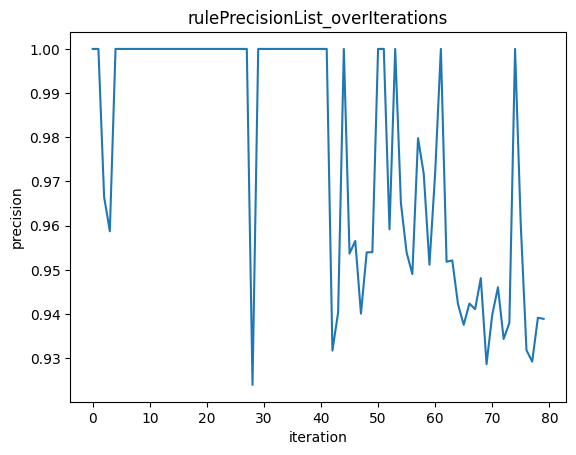

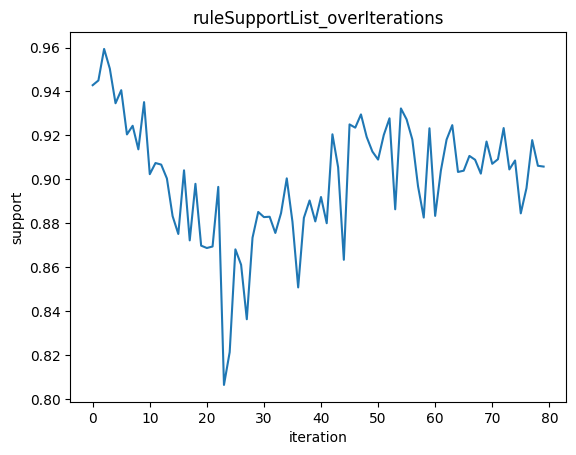

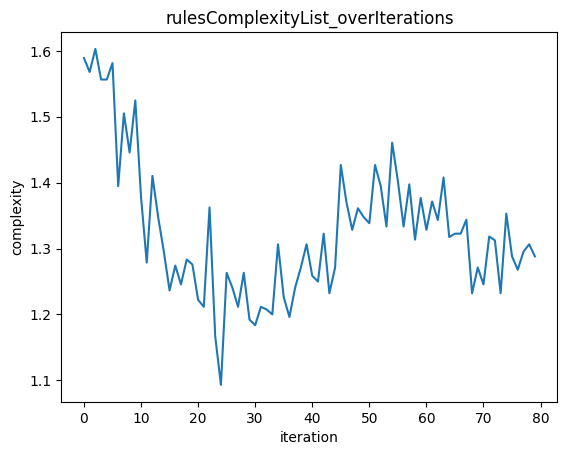

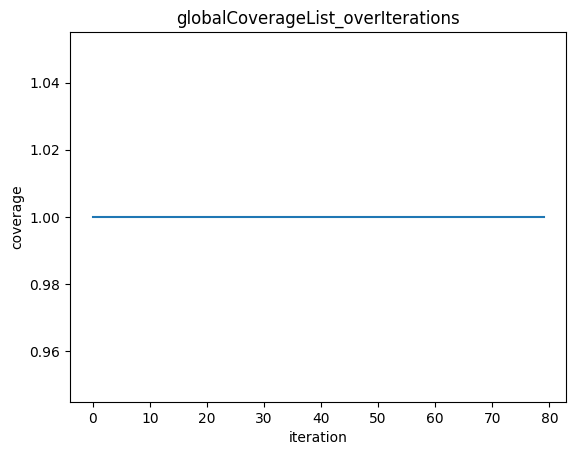

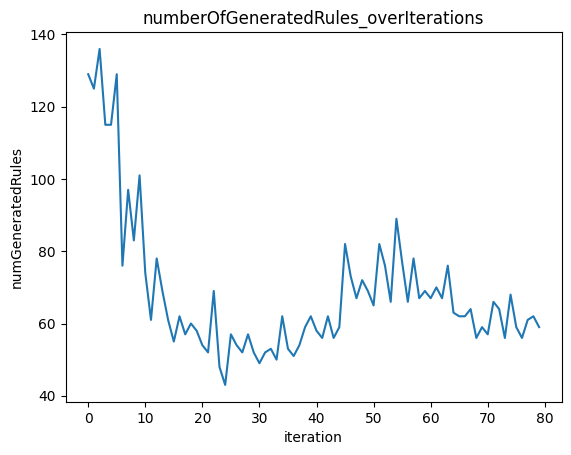

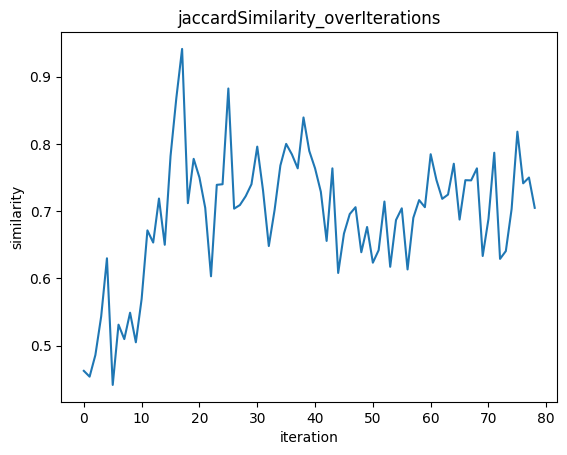

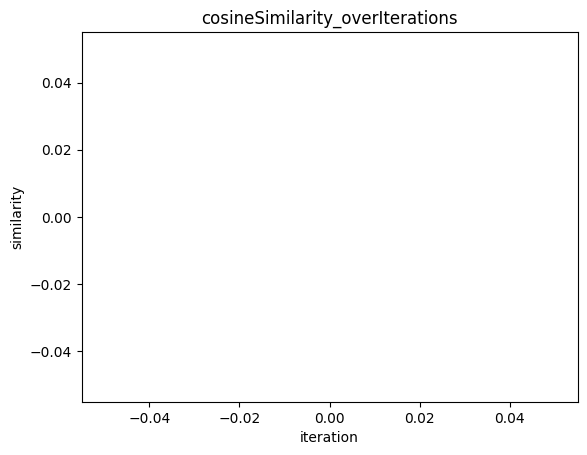

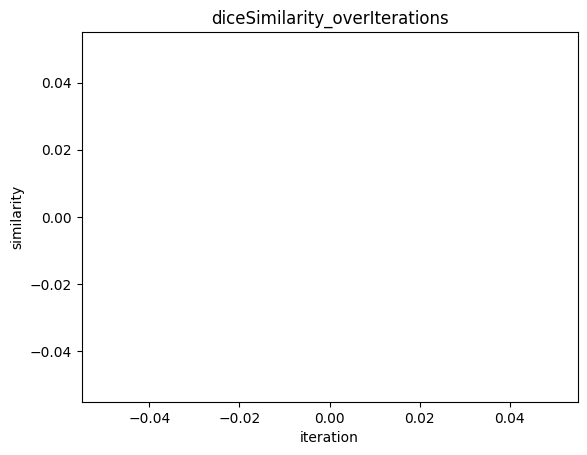

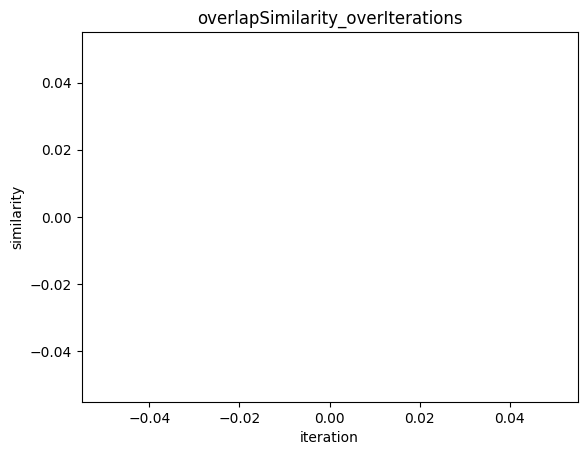

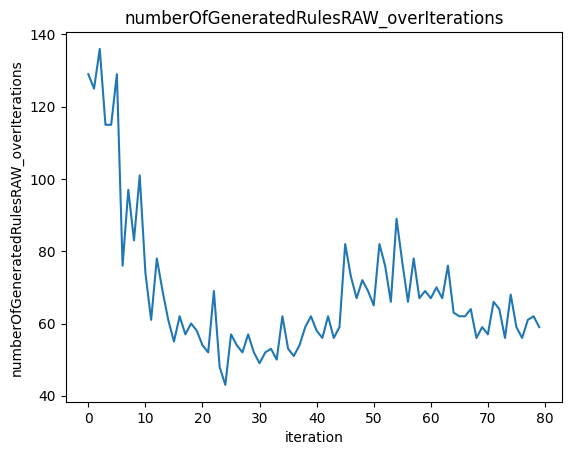

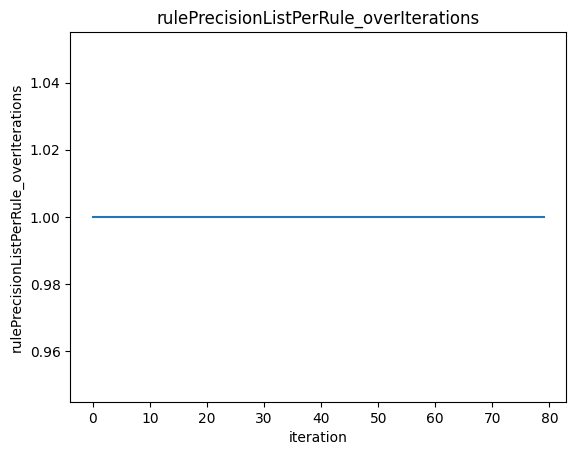

In [ ]:
import os
rules_data = np.load(pathToNPZ , allow_pickle=True)

pathToDiscriminative_rules = "./Results/rulesResults/discriminative_rules/"
pathToCharacteristic_rules = "./Results/rulesResults/characteristic_rules"
resultPaths_dicriminative_rules = os.listdir(pathToDiscriminative_rules)
resultPaths_characteristic_rules = os.listdir(pathToCharacteristic_rules)
resultPaths_dicriminative_rules= np.sort(resultPaths_dicriminative_rules)

#get last generated rule

mostRecentResultPaths_discriminative = pathToDiscriminative_rules + (resultPaths_dicriminative_rules[-1])
data = utils.loadData(mostRecentResultPaths_discriminative)
temp_rules_list_overIterations = data["rules_list_overIterations"]
trackedRules_OHE = cega_utils.trackRulesList(temp_rules_list_overIterations)
print(pathToNPZ)
utils.appendToNPZ(pathToNPZ, "trackedRules_OHE", trackedRules_OHE)

plotResults.plotRulesResults(data)
_t_end = time()
print(f"Training finished in {int(_t_end - _t_start)} s")